In [1]:
from coptpy import *

In [2]:
Nodes=['F','C','B','C1','C2','C3','C4']

In [3]:
Arcs,capacity,weight,profit = multidict({
    ('S','F'):[0,12,0],
    ('S','C'):[0,18,0],
    ('S','B'):[0,10,0],
    ('F','C1'):[-500,COPT.INFINITY,0],
    ('F','C2'):[-700,COPT.INFINITY,0],
    ('F','C3'):[-600,COPT.INFINITY,0],
    ('F','C4'):[-400,COPT.INFINITY,0],
    ('B','C1'):[-500,COPT.INFINITY,0],
    ('B','C2'):[-700,COPT.INFINITY,0],
    ('B','C3'):[-600,COPT.INFINITY,0],
    ('B','C4'):[-400,COPT.INFINITY,0],
    ('C','C1'):[-500,COPT.INFINITY,0],
    ('C','C2'):[-700,COPT.INFINITY,0],
    ('C','C3'):[-600,COPT.INFINITY,0],
    ('C','C4'):[-400,COPT.INFINITY,0],
    ('C1','T'):[0,20,320],
    ('C2','T'):[0,16,400],
    ('C3','T'):[0,25,360],
    ('C4','T'):[0,13,290],
    ('S','T'):[0,COPT.INFINITY,0]})

In [4]:
# Create environment
env = Envr()
# Create model 
model = env.createModel(name="MCNF_b")

Cardinal Optimizer v5.0.4. Build date Aug 19 2022
Copyright Cardinal Operations 2022. All Rights Reserved



In [5]:
#Add variables
transport = model.addVars(Arcs,ub=weight)
#Add Origins constraints:
model.addConstr(transport.sum('S',"*") == 40)
#Add Destinations constraints:
model.addConstr(-transport.sum("*",'T') == -40)
#Add constraints:其余Nodes的约束，流入=流出
for n in Nodes:
    model.addConstr(transport.sum(n,"*") == transport.sum("*",n))
#Add constraints:飞机容量和重量约束
model.addConstr(transport.prod(capacity,'F',"*") + 7000 >= 0)
model.addConstr(transport.prod(capacity,'C',"*") + 9000 >= 0)
model.addConstr(transport.prod(capacity,'B',"*") + 5000 >= 0)
model.addConstr(transport.sum('F',"*")/12 == transport.sum('C',"*")/18 == transport.sum('B',"*")/10)

<coptpy.Constraint: >

In [8]:
#Set Objective
model.setObjective(transport.prod(profit), sense=COPT.MAXIMIZE)

In [9]:
#solve the problem
model.solve()

Model fingerprint: b6b20211

Hardware has 8 cores and 16 threads. Using instruction set X86_NATIVE (1)
Maximizing an LP problem

The original problem has:
    13 rows, 20 columns and 60 non-zero elements
The presolved problem has:
    12 rows, 19 columns and 58 non-zero elements

Starting the simplex solver using up to 8 threads

Method   Iteration           Objective  Primal.NInf   Dual.NInf        Time
Dual             0    2.5570071177e+04            5           0       0.00s
Dual            15    1.3330047694e+04            0           0       0.00s
Postsolving
Dual            15    1.3330000000e+04            0           0       0.00s

Solving finished
Status: Optimal  Objective: 1.3330000000e+04  Iterations: 15  Time: 0.00s


In [10]:
# Analyze solution
if model.status == COPT.OPTIMAL:
    # Optimal objective value
    print("Optimal Value of objective:{:.4f}".format(model.objval))
    allvars = model.getVars()
    #Variable value
    print("\nValue of each variable:")
    for var in allvars:
        print("decision variable{0},optimal solution is {1:.4f}".format(var.name, var.x))    

Optimal Value of objective:13330.0000

Value of each variable:
decision variableC(S,F),optimal solution is 12.0000
decision variableC(S,C),optimal solution is 18.0000
decision variableC(S,B),optimal solution is 10.0000
decision variableC(F,C1),optimal solution is 0.0000
decision variableC(F,C2),optimal solution is 7.3333
decision variableC(F,C3),optimal solution is 0.0000
decision variableC(F,C4),optimal solution is 4.6667
decision variableC(B,C1),optimal solution is 0.0000
decision variableC(B,C2),optimal solution is 3.3333
decision variableC(B,C3),optimal solution is 0.0000
decision variableC(B,C4),optimal solution is 6.6667
decision variableC(C,C1),optimal solution is 15.5000
decision variableC(C,C2),optimal solution is 0.8333
decision variableC(C,C3),optimal solution is 0.0000
decision variableC(C,C4),optimal solution is 1.6667
decision variableC(C1,T),optimal solution is 15.5000
decision variableC(C2,T),optimal solution is 11.5000
decision variableC(C3,T),optimal solution is 0.000

According to results, the optimal profit is 13330. Cargo 1 has 15.5 tons loaded in the center compartment.Cargo 2 has $\frac{22}{3}$ tons loaded in the front compartment, $\frac{5}{6}$ tons loaded in the center compartment and $\frac{10}{3}$ tons loaded in the back compartment. Cargo 4 has $\frac{14}{3}$ tons loaded in the front commpartment, $\frac{5}{3}$ tons loaded in the center compartment and $\frac{20}{3}$ tons loaded in the back compartment. None of cargo 3 should be loaded. The plan is shown in the table below:
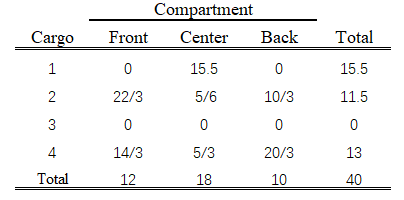